In [76]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os 
import pandas as pd
from scipy import stats

In [2]:
save_plot = False

plot_dir = 'plots/01/'
os.system('mkdir -p {}'.format(plot_dir))

0

In [26]:
# os.system('module load texlive') # load latex on vollmond

sh: module: command not found


32512

In [27]:
plt.rcParams.update({
    "text.usetex": True,
    "font.size": 12,
    "font.family": "serif",
#     "font.serif": "Times",
    'axes.labelsize': 12,
    "legend.fontsize":11,
    "font.sans-serif": ["Helvetica"],
#    "text.latex.preamble": [r'"\usepackage{amsmath}"'],
})


In [29]:
path = 'data/total_defl_moliere_1PeV_1TeV_ecut500/'

df_dict = {}
for i, hdf in enumerate(sorted(os.listdir(path))):
    df = pd.read_hdf(path + hdf, key='seed_3')
    df_dict['df_%02d' %(i+1)] = df

In [30]:
labels = [
    'G4+MSM',
    'vG+MSM',
    'MSM only',
    'vG',
    'G4'
]

0.04140685126915454 0.008684475513560622 0.11222002616333392
0.04440737922529519 0.011034057735919535 0.11570095688895893
0.03843360919482125 0.006619954917245967 0.0960251797219819
0.013396631577587576 0.001825597785491299 0.06200301059285674
0.006970367715656984 0.0007958558305742241 0.048254622740293164


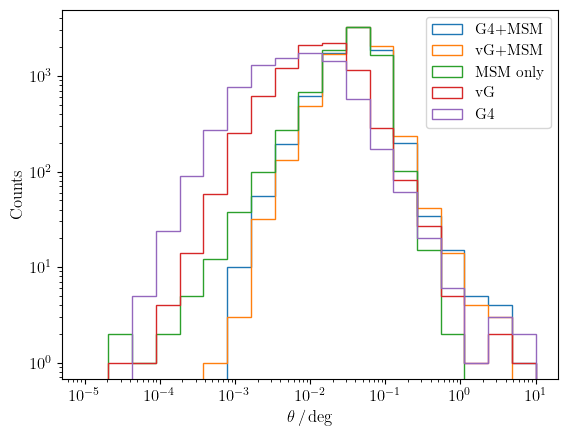

In [34]:
bins = np.logspace(-5, 1, 20)
for i, df in enumerate(df_dict.keys()):
    print(df_dict[df].deflection.median(), np.quantile(df_dict[df].deflection, 0.05), np.quantile(df_dict[df].deflection, 0.95))
    plt.hist(df_dict[df].deflection, bins=bins, histtype='step', label=labels[i])

plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\theta\,/\,$deg')
plt.ylabel('Counts')
plt.legend()

In [32]:
path = 'data/total_defl_moliere_1PeV_1TeV_vcut0_05/'

df_dict = {}
for i, hdf in enumerate(sorted(os.listdir(path))):
    df = pd.read_hdf(path + hdf, key='seed_3')
    df_dict['df_%02d' %(i+1)] = df

0.04140685126915454 0.008684475513560622 0.11222002616333392
0.04440737922529519 0.011034057735919535 0.11570095688895893
0.03843360919482125 0.006619954917245967 0.0960251797219819
0.013396631577587576 0.001825597785491299 0.06200301059285674
0.006970367715656984 0.0007958558305742241 0.048254622740293164


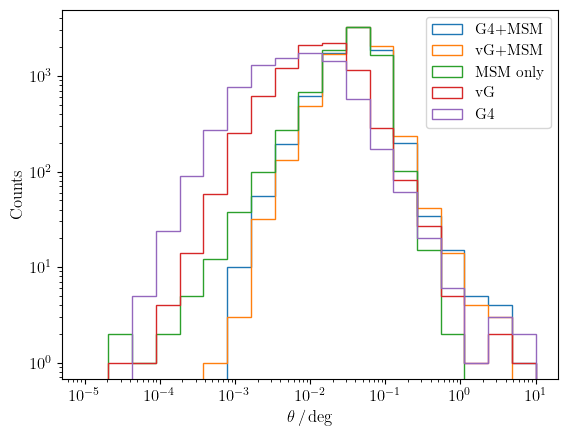

In [35]:
bins = np.logspace(-5, 1, 20)
for i, df in enumerate(df_dict.keys()):
    print(df_dict[df].deflection.median(), np.quantile(df_dict[df].deflection, 0.05), np.quantile(df_dict[df].deflection, 0.95))
    plt.hist(df_dict[df].deflection, bins=bins, histtype='step', label=labels[i])

plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\theta\,/\,$deg')
plt.ylabel('Counts')
plt.legend()

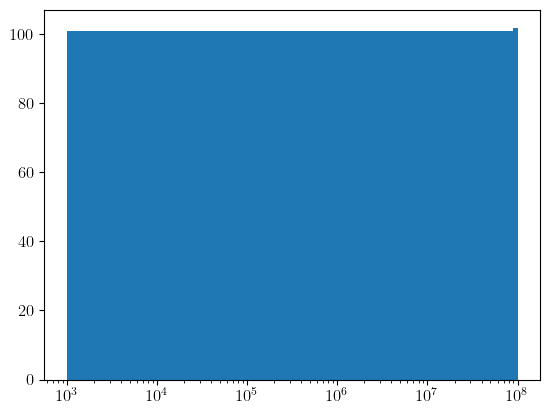

In [38]:
x = np.geomspace(1e3, 1e8, 10000)
bins = np.geomspace(1e3, 1e8, 100)
plt.hist(x, bins=bins)
plt.xscale('log')

In [150]:
path = 'data/total_defl_moliere_1PeV_continuous_E_f/'

df_dict = {}
for i, hdf in enumerate(sorted(os.listdir(path))):
    df = pd.read_hdf(path + hdf, key='seed_3')
    df_dict['df_%02d' %(i+1)] = df

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


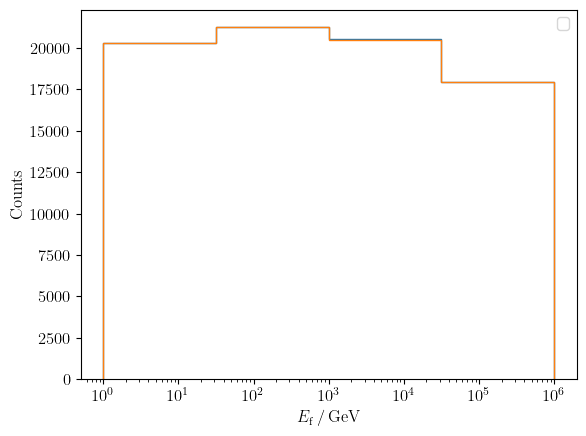

In [151]:
bins = np.logspace(0, 6, 5)
for i, df in enumerate(df_dict.keys()):
    plt.hist(df_dict[df].E_f, bins=bins, histtype='step')

plt.xscale('log')
#plt.yscale('log')
plt.xlabel(r'$E_{\mathrm{f}}\,/\,$GeV')
plt.ylabel('Counts')
plt.legend()

0.03550615965706978 8.151973650331248e-05 1.2315619022045428
0.048032469932168836 9.964291967808666e-05 1.4298165718395384


Text(0, 0.5, 'Counts')

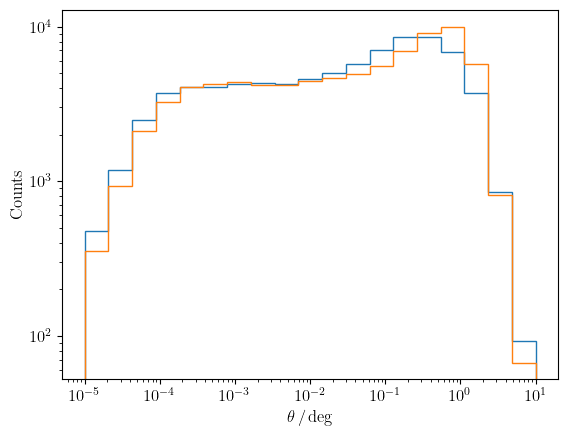

In [152]:
bins = np.logspace(-5, 1, 20)
for i, df in enumerate(df_dict.keys()):
    print(df_dict[df].deflection.median(), np.quantile(df_dict[df].deflection, 0.05), np.quantile(df_dict[df].deflection, 0.95))
    plt.hist(df_dict[df].deflection, bins=bins, histtype='step')

plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\theta\,/\,$deg')
plt.ylabel('Counts')

In [153]:
def paper_medians(x):
    return np.power(10, 0.0176 * x**3 + -0.2328 * x**2 + 0.0929 * x + 0.0726)

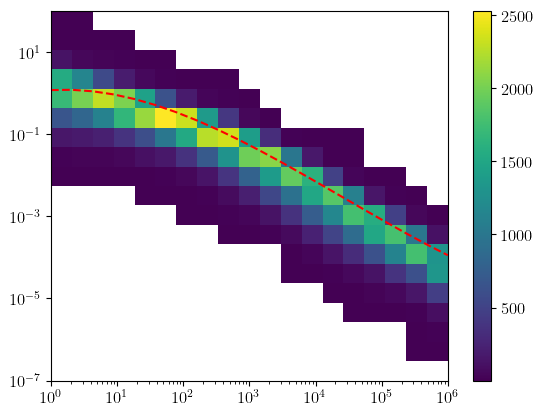

In [154]:
df = 'df_01'
bins = (np.logspace(0, 6, 20), np.logspace(-7, 2, 20))
plt.hist2d(df_dict[df].E_f, df_dict[df].deflection, bins=bins, cmin=1)
plt.plot(bins[0], paper_medians(np.log10(bins[0])), 'r--')
plt.xscale('log')
plt.yscale('log')
plt.colorbar()

In [155]:
def lower_int(x, level=0.99):
    return np.quantile(x, (1-level)/2)

def upper_int(x, level=0.99):
    return np.quantile(x, level + (1-level)/2)

[1.07307679e+00 1.00120015e+00 8.89537427e-01 6.99760306e-01
 5.21350912e-01 3.76684035e-01 2.42253417e-01 1.49337510e-01
 8.25028123e-02 4.47901432e-02 2.28948882e-02 1.10749863e-02
 5.26694526e-03 2.60223527e-03 1.23091200e-03 6.45785379e-04
 3.24293532e-04 1.80510991e-04 7.31335676e-05]


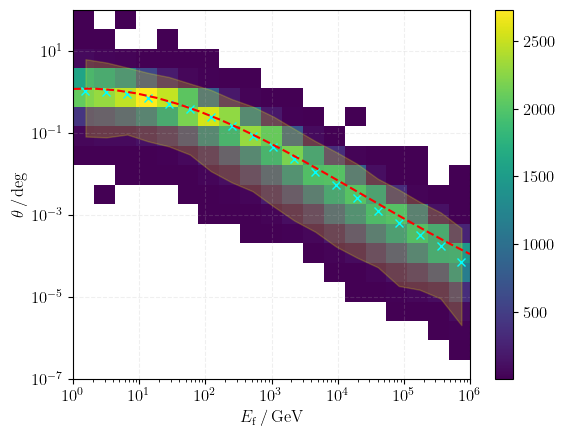

In [164]:
df = 'df_02'
bins = (np.logspace(0, 6, 20), np.logspace(-7, 2, 20))
plt.hist2d(df_dict[df].E_f, df_dict[df].deflection, bins=bins, cmin=1)

bin_mids = [bins[0][i] + (bins[0][i+1] - bins[0][i])/2 for i in range(len(bins[0])-1)]

ret_median = stats.binned_statistic(df_dict[df].E_f.values, values=df_dict[df].deflection.values, statistic='median', bins=bins[0])
plt.plot(bin_mids, ret_median.statistic, 'x', color='cyan')
print(ret_median.statistic)

ret_lower = stats.binned_statistic(df_dict[df].E_f.values, values=df_dict[df].deflection.values, statistic=lower_int, bins=bins[0])
# plt.plot(bin_mids, ret_lower.statistic, '.b')
ret_upper = stats.binned_statistic(df_dict[df].E_f.values, values=df_dict[df].deflection.values, statistic=upper_int, bins=bins[0])
# plt.plot(bin_mids, ret_upper.statistic, '.b')
plt.fill_between(bin_mids, ret_lower.statistic, ret_upper.statistic, alpha=0.2, color='yellow')

plt.plot(bins[0], paper_medians(np.log10(bins[0])), 'r--')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$E_{\mathrm{f}}\,/\,$GeV')
plt.ylabel(r'$\theta\,/\,$deg')
plt.colorbar()
plt.grid(alpha=0.2, linestyle='--')

In [157]:
df = 'df_02'
bins = (np.logspace(0, 6, 20), np.logspace(-8, 3, 20))
ret = stats.binned_statistic(df_dict[df].E_f.values, values=df_dict[df].deflection.values, statistic='median', bins=bins[0], )
ret.statistic

array([1.07307679e+00, 1.00120015e+00, 8.89537427e-01, 6.99760306e-01,
       5.21350912e-01, 3.76684035e-01, 2.42253417e-01, 1.49337510e-01,
       8.25028123e-02, 4.47901432e-02, 2.28948882e-02, 1.10749863e-02,
       5.26694526e-03, 2.60223527e-03, 1.23091200e-03, 6.45785379e-04,
       3.24293532e-04, 1.80510991e-04, 7.31335676e-05])

In [167]:
path = 'data/total_defl_moliere_10TeV_continuous_E_f/'

df_dict = {}
for i, hdf in enumerate(sorted(os.listdir(path))):
    df = pd.read_hdf(path + hdf, key='seed_3')
    df_dict['df_%02d' %(i+1)] = df

[1.05697493 1.01521209 0.88894982 0.72431012 0.53976294 0.37678933
 0.25426858 0.15407607 0.08307446 0.03284923        nan        nan
        nan        nan        nan        nan        nan        nan
        nan]


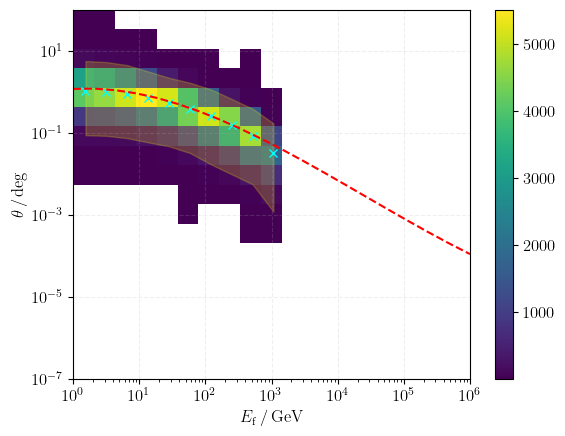

In [168]:
df = 'df_02'
bins = (np.logspace(0, 6, 20), np.logspace(-7, 2, 20))
plt.hist2d(df_dict[df].E_f, df_dict[df].deflection, bins=bins, cmin=1)

bin_mids = [bins[0][i] + (bins[0][i+1] - bins[0][i])/2 for i in range(len(bins[0])-1)]

ret_median = stats.binned_statistic(df_dict[df].E_f.values, values=df_dict[df].deflection.values, statistic='median', bins=bins[0])
plt.plot(bin_mids, ret_median.statistic, 'x', color='cyan')
print(ret_median.statistic)

ret_lower = stats.binned_statistic(df_dict[df].E_f.values, values=df_dict[df].deflection.values, statistic=lower_int, bins=bins[0])
# plt.plot(bin_mids, ret_lower.statistic, '.b')
ret_upper = stats.binned_statistic(df_dict[df].E_f.values, values=df_dict[df].deflection.values, statistic=upper_int, bins=bins[0])
# plt.plot(bin_mids, ret_upper.statistic, '.b')
plt.fill_between(bin_mids, ret_lower.statistic, ret_upper.statistic, alpha=0.2, color='yellow')

plt.plot(bins[0], paper_medians(np.log10(bins[0])), 'r--')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$E_{\mathrm{f}}\,/\,$GeV')
plt.ylabel(r'$\theta\,/\,$deg')
plt.colorbar()
plt.grid(alpha=0.2, linestyle='--')